<a href="https://colab.research.google.com/github/columose/WOAH-FMD-dataset/blob/main/1_Cleaning_WOAH_excel_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset**

I obtained this dataset from the *World Organisation of Animal Health*. The dataset contains data relating to foot and mouth disease in animals spanning the years 2005-2024 for numerous countries and world regions. My goal was to visualise the data and see if I could detect any trends between overall foot and mouth cases and outcomes.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WOAH/woah_f_m.csv')
df.head()

,Year,Semester,World region,Country,Administrative Division,Disease,Serotype/Subtype/Genotype,Animal Category,Species,Event_id,Outbreak_id,New outbreaks,Susceptible,Measuring units,Cases,Killed and disposed of,Slaughtered,Deaths,Vaccinated
0,2005,Jul-Dec 2005,Africa,Benin,Abomey,Foot and mouth disease virus (Inf. with),A;O;SAT 1;SAT 2,Both animal categories,-,-,-,1,-,-,-,-,-,-,-
1,2005,Jul-Dec 2005,Africa,Benin,Abomey,Foot and mouth disease virus (Inf. with),A;O;SAT 1;SAT 2,Domestic,Cattle,-,-,-,884,Animal,30,0,0,0,0
2,2005,Jul-Dec 2005,Africa,Benin,Banikoara,Foot and mouth disease virus (Inf. with),A;O;SAT 1;SAT 2,Both animal categories,-,-,-,2,-,-,-,-,-,-,-
3,2005,Jul-Dec 2005,Africa,Benin,Banikoara,Foot and mouth disease virus (Inf. with),A;O;SAT 1;SAT 2,Domestic,Cattle,-,-,-,"1,202",Animal,96,0,4,78,0
4,2005,Jul-Dec 2005,Africa,Benin,Come,Foot and mouth disease virus (Inf. with),A;O;SAT 1;SAT 2,Both animal categories,-,-,-,2,-,-,-,-,-,-,-


In [ ]:
# Clean df by replacing '-' with Nans and filling Nans with the value in the cell above
df['New outbreaks'] = df['New outbreaks'].replace('-',pd.NA)
df['New outbreaks'] = df['New outbreaks'].fillna(method='ffill')


In [ ]:
# Drop 'both animal categories' entries that are now redundant
df = df[df['Animal Category'] != 'Both animal categories']

# Drop outbreak and event IDs that are empty
df = df.drop(['Serotype/Subtype/Genotype','Disease','Outbreak_id', 'Event_id'], axis = 1)

df.head(3)

,Year,Semester,World region,Country,Administrative Division,Animal Category,Species,New outbreaks,Susceptible,Measuring units,Cases,Killed and disposed of,Slaughtered,Deaths,Vaccinated
1,2005,Jul-Dec 2005,Africa,Benin,Abomey,Domestic,Cattle,1,884,Animal,30,0,0,0,0
3,2005,Jul-Dec 2005,Africa,Benin,Banikoara,Domestic,Cattle,2,"1,202",Animal,96,0,4,78,0
5,2005,Jul-Dec 2005,Africa,Benin,Come,Domestic,Cattle,2,224,Animal,100,0,0,2,0


In [ ]:
# Replace NaNs in last few integer value columns with 0s
df_clean = df.replace(to_replace = '-', value = '0')

# Drop commas for integer conversion
df_clean.replace(',','', regex=True, inplace=True)

# Reset indices after all of the cleaning
df_clean = df_clean.reset_index(drop = True)
df_clean.head()

,Year,Semester,World region,Country,Administrative Division,Animal Category,Species,New outbreaks,Susceptible,Measuring units,Cases,Killed and disposed of,Slaughtered,Deaths,Vaccinated
0,2005,Jul-Dec 2005,Africa,Benin,Abomey,Domestic,Cattle,1,884,Animal,30,0,0,0,0
1,2005,Jul-Dec 2005,Africa,Benin,Banikoara,Domestic,Cattle,2,1202,Animal,96,0,4,78,0
2,2005,Jul-Dec 2005,Africa,Benin,Come,Domestic,Cattle,2,224,Animal,100,0,0,2,0
3,2005,Jul-Dec 2005,Africa,Benin,Djougou,Domestic,Cattle,1,54,Animal,7,0,0,0,0
4,2005,Jul-Dec 2005,Africa,Benin,Gogounou,Domestic,Cattle,1,252,Animal,22,0,0,0,0


In [ ]:
# Save file to google drive
df_clean.to_csv('/content/drive/MyDrive/Colab Notebooks/WOAH/clean_data.csv')

In [ ]:
# Convert country-grouped dataframe to geopandas dataframe for plotting

import geopandas as gpd

# Download the 'naturalearth_lowres' dataset for geometric coordinates
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# merge coordinates with df countries
merged_gdf = world.merge(df_grouped_new, how='left', left_on='name', right_on='Country')

# Filter out NaN rows
merged_gdf = merged_gdf.dropna(subset=['New outbreaks'])

merged_gdf.head()

<ipython-input-15-403a9cab938f>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,New outbreaks,Susceptible,Cases,Killed and disposed of,Slaughtered,Deaths,Vaccinated
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",480.0,1307913.0,42006.0,0.0,0.0,592.0,22262.0
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",83.0,67975.0,11427.0,18679.0,0.0,12.0,480132.0
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",155881.0,0.0,618798.0,0.0,0.0,0.0,0.0
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",10.0,0.0,71.0,5051.0,0.0,0.0,95952.0
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",252.0,33427.0,2486.0,0.0,0.0,158.0,0.0


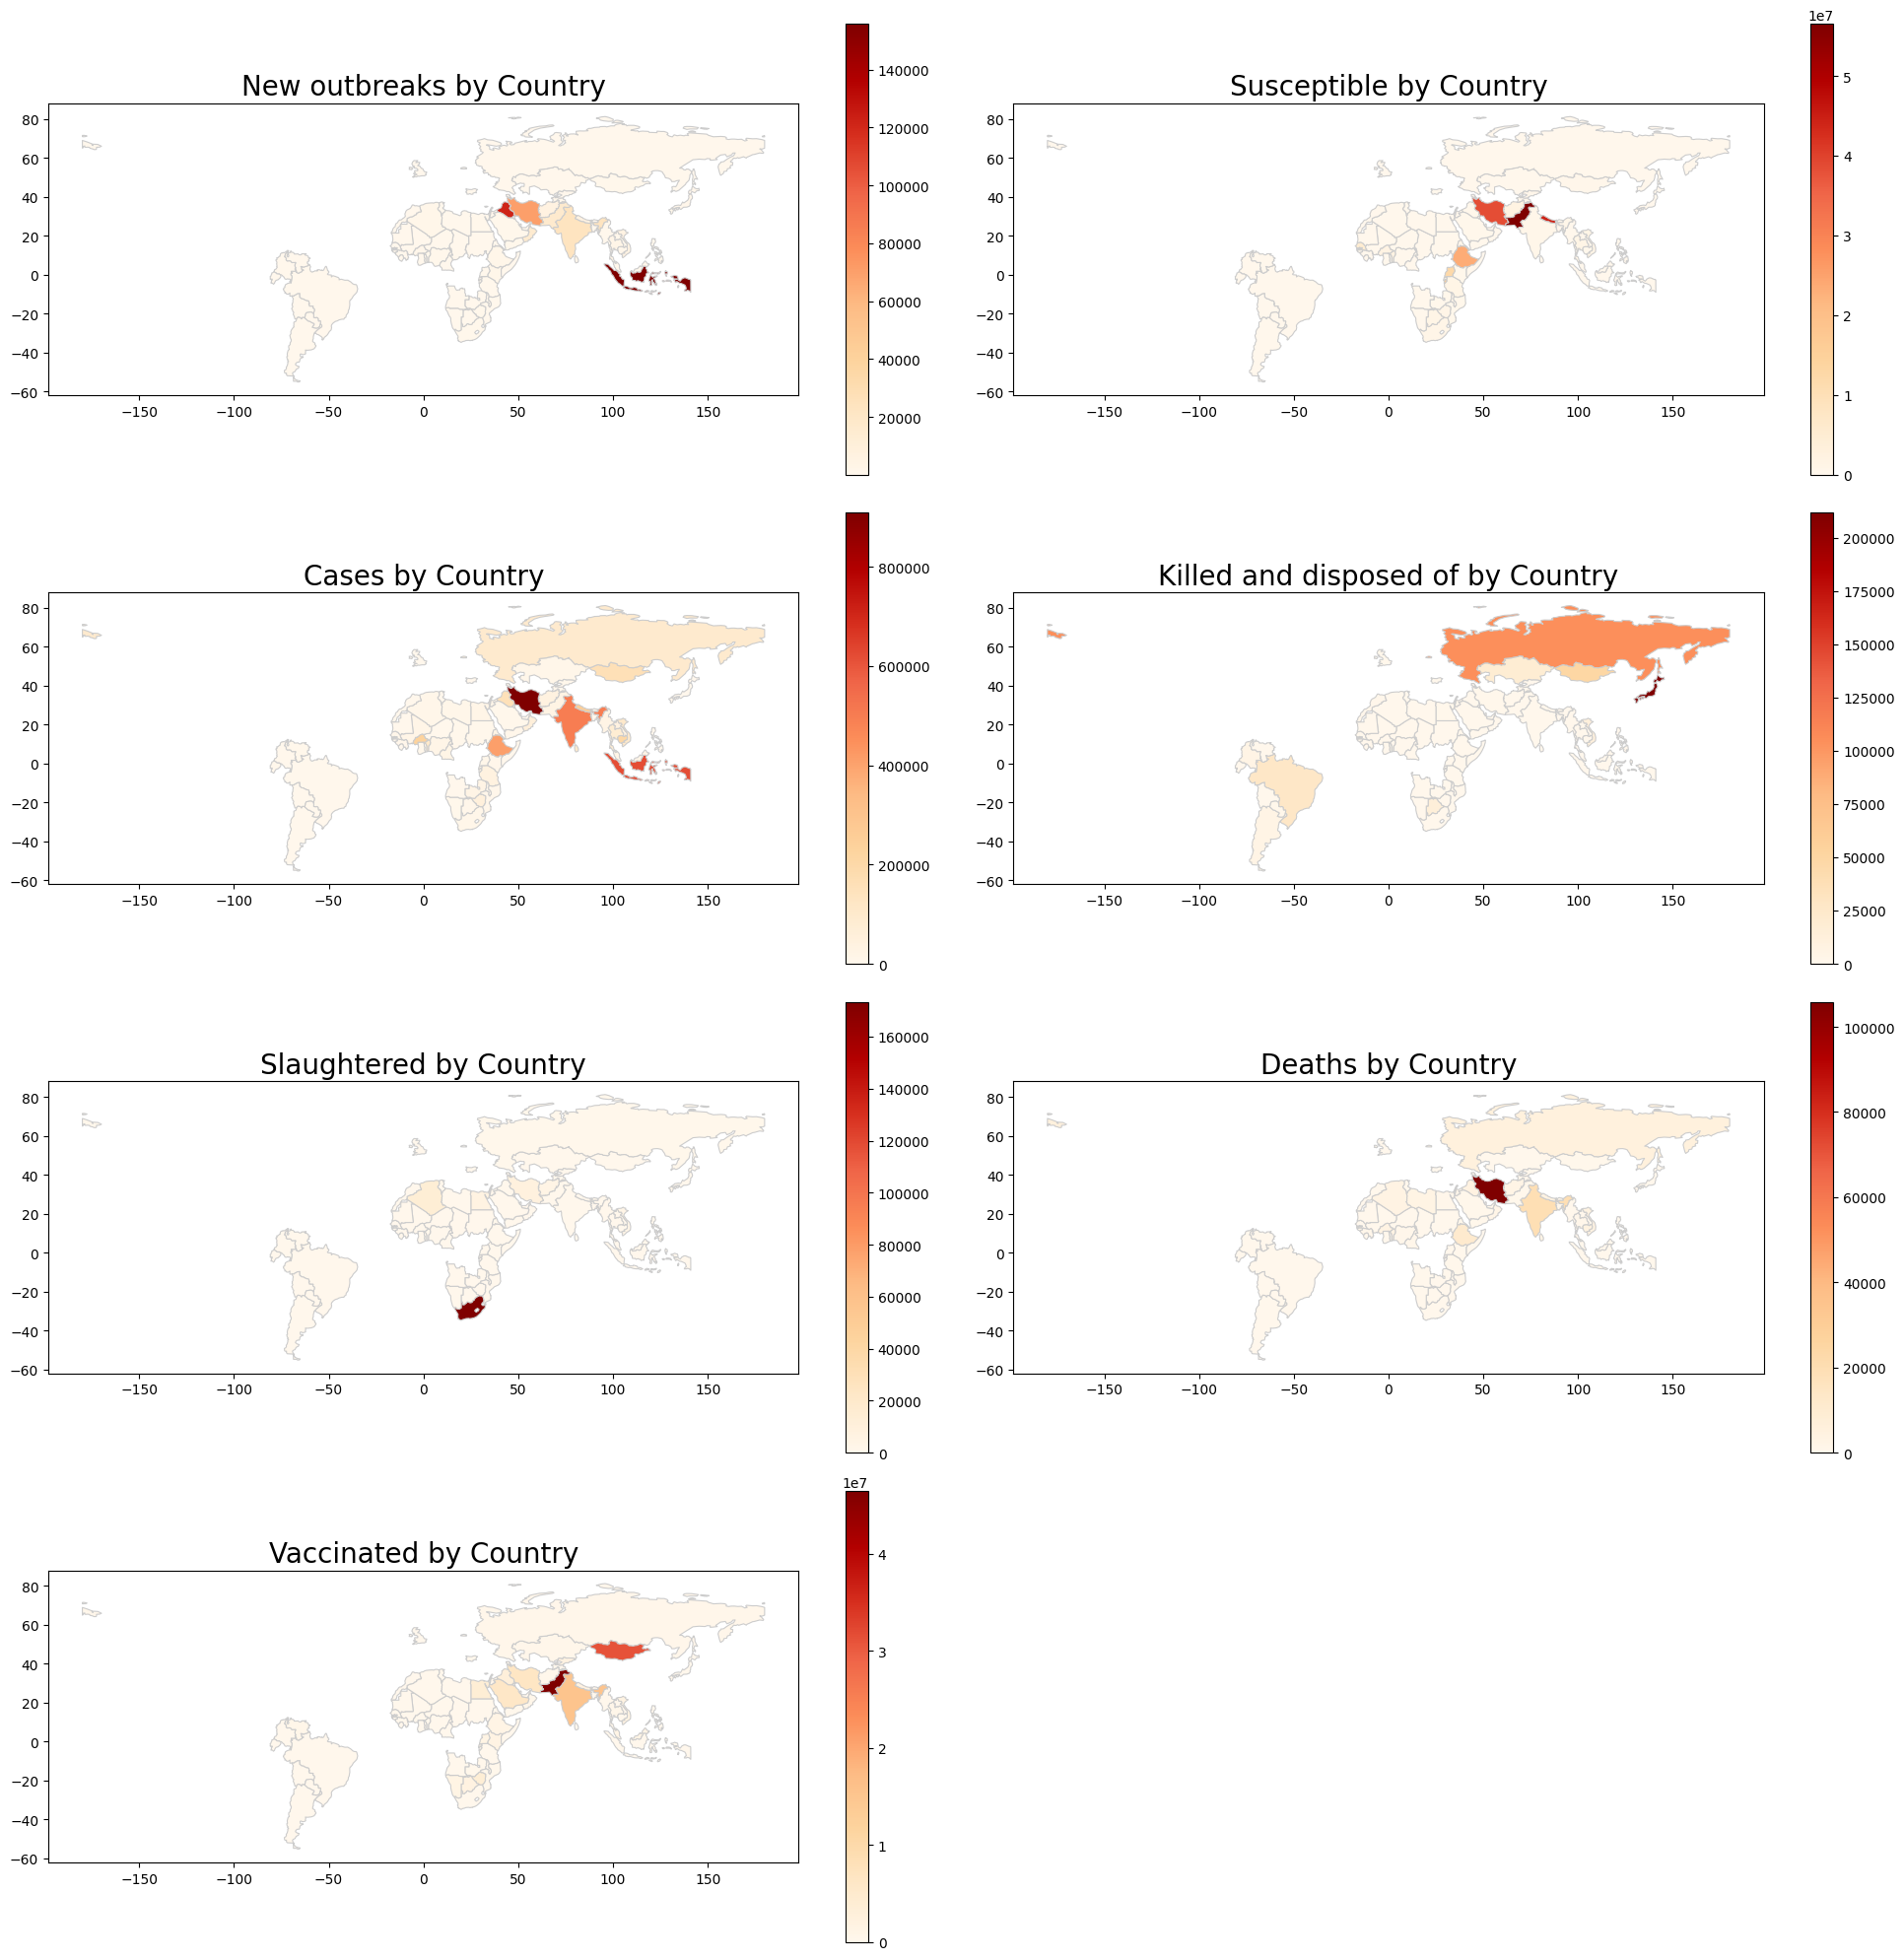

In [ ]:
# Create nice subplots with country data

fig, axs = plt.subplots(4,2,figsize=(20, 20))

for ivar, var in enumerate(test_vars):
    row_idx, col_idx = divmod(ivar, 2)  # Determine subplot row and column
    merged_gdf.plot(column=var, cmap='OrRd', linewidth=0.8, ax=axs[row_idx, col_idx], edgecolor='0.8', legend=True)

    axs[row_idx, col_idx].set_title(f'{var} by Country', fontdict={'fontsize': '20', 'fontweight': '3'})

fig.delaxes(axs[3,1]) # Delete axis that contains no data
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Define target and feature variables for model
y = df_grouped_new['New outbreaks']

features = ['Vaccinated']
X = df_grouped_new[features]

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)

print(r2_score(val_y,preds))
print(mean_absolute_error(val_y, preds))
print(preds-val_y)

-27.625571344485998
4868.315085719522
Country
Angola              1485.100000
Gambia              8018.024830
Mongolia           19912.890000
Cameroon            7433.024830
Burkina Faso        2459.709415
Nepal              -5816.750000
Niger               3367.709415
Sudan               7834.024830
Guinea-Bissau       7822.024830
Sri Lanka            -33.140000
South Africa        -677.840000
Benin               2799.709415
Malawi              4400.520000
Venezuela           8875.450000
Zimbabwe           10282.920000
Namibia               69.990000
Bhutan                42.690000
Comoros             7988.024830
Senegal              -46.210000
Korea (Rep. of)     -337.850000
Ecuador               63.720000
Kenya               1290.190000
Cote D'Ivoire       7797.024830
Bangladesh          7985.024830
Name: New outbreaks, dtype: float64
